<a href="https://colab.research.google.com/github/oscarcastillout-hash/Python_Amazon_Sales_Analysis_2024/blob/main/Python_Amazon_Sales_Analysis_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AMASON SALES ANALYSIS 2024 - The most profitable items sold by Amazon during 2024

**PLEASE NOTE: **This project was created by Oscar as part of a data science portfolio focused on SQL-based analysis, Python automation, and ***ethical data simulation.***

TABLE OF CONTENTS:

Task 1: Synthetic Data Generation

Task 2: SQL Schema Design

Task 3: Data Cleaning & Transformation

Task 4: SQL Queries for Profitability Insights

Task 5: Key Metrics (Revenue, Profit, Units Sold)

Task 6: Visualization & Reporting

Task 7: Export (PNG/CSV)

In [68]:
## Task 1: Synthetic Data Generation
## Task 2: SQL Schema Design
import pandas as pd
import numpy as np

np.random.seed(42)
categories = ['Electronics', 'Books', 'Home', 'Fashion', 'Toys']
data = pd.DataFrame({
    'product_id': range(1, 501),
    'product_name': [f'Product_{i}' for i in range(1, 501)],
    'category': np.random.choice(categories, 500),
    'units_sold': np.random.randint(100, 10000, 500),
    'price': np.round(np.random.uniform(10, 500, 500), 2)
})

# Calculate the cost for each row using the lambda function
data['cost'] = data.apply(lambda row: np.round(row['price'] * np.random.uniform(0.5, 0.9), 2), axis=1)

data['revenue'] = data['units_sold'] * data['price']
data['profit'] = data['units_sold'] * (data['price'] - data['cost'])

display(data.head())

## PLEASE NOTE THE PRODUCT NAME BELOW - WE WILL TAKE CORRECTIVE ACTION ON NEXT STEP

,product_id,product_name,category,units_sold,price,cost,revenue,profit
0,1,Product_1,Fashion,8887,47.89,41.86,425598.43,53588.61
1,2,Product_2,Toys,828,61.08,53.69,50574.24,6118.92
2,3,Product_3,Home,1465,421.82,316.42,617966.30,154411.00
3,4,Product_4,Toys,4592,456.24,371.09,2095054.08,391008.80
4,5,Product_5,Toys,798,70.18,52.28,56003.64,14284.20


In [69]:
## Task 3: Data Cleaning & Transformation

import sqlite3
import pandas as pd

# Update generic product name with real items (i.e Product_1 through 5)
# Re-establish the connection to the in-memory database
conn = sqlite3.connect(':memory:')

# We need to re-insert the data as it's an in-memory database
# In a real application with a persistent file, this step would not be needed
data.to_sql('products', conn, if_exists='replace', index=False)

cursor = conn.cursor()

# Perform the first update
cursor.execute("""
UPDATE products
SET product_name = 'Diesel Stonewash Jeans'
WHERE product_id = 1;
""")

# Perform the second update
cursor.execute("""
UPDATE products
SET product_name = 'Nintendo Switch'
WHERE product_id = 2;
""")

# Perform the thrid update
cursor.execute("""
UPDATE products
SET product_name = 'Samsung 4K TV 55 inches'
WHERE product_id = 3;
""")

# Perform the fouth update
cursor.execute("""
UPDATE products
SET product_name = 'Sony Playstation 5'
WHERE product_id = 4;
""")

# Perform the fifth update
cursor.execute("""
UPDATE products
SET product_name = 'Xbox Game Console 2024'
WHERE product_id = 5;
""")

# Commit the changes
conn.commit()


# Example query: Select all data from the products table
cursor.execute("SELECT * FROM products;")

# Fetch all the results
rows = cursor.fetchall()

# You can now process the rows, for example, convert them to a pandas DataFrame
columns = [description[0] for description in cursor.description]
query_result_df = pd.DataFrame(rows, columns=columns)

display(query_result_df.head())

# Close the connection
conn.close()

,product_id,product_name,category,units_sold,price,cost,revenue,profit
0,1,Diesel Stonewash Jeans,Fashion,8887,47.89,41.86,425598.43,53588.61
1,2,Nintendo Switch,Toys,828,61.08,53.69,50574.24,6118.92
2,3,Samsung 4K TV 55 inches,Home,1465,421.82,316.42,617966.30,154411.00
3,4,Sony Playstation 5,Toys,4592,456.24,371.09,2095054.08,391008.80
4,5,Xbox Game Console 2024,Toys,798,70.18,52.28,56003.64,14284.20


In [71]:
## Task 4: SQL Queries for Profitability Insights
## Task 5: Key Metrics (Revenue, Profit, Units Sold)

import sqlite3
import pandas as pd

# Re-establish the connection to the in-memory database
# In a real application, you would connect to a persistent database file
conn = sqlite3.connect(':memory:')

# Insert data from the DataFrame into the table
data.to_sql('products', conn, if_exists='replace', index=False)

cursor = conn.cursor()

# Execute the SQL query to calculate total profit by category
cursor.execute("""
SELECT category, SUM(profit) AS total_profit
FROM products
GROUP BY category
ORDER BY total_profit DESC;
""")

# Fetch all the results
profit_by_category_data = cursor.fetchall()

# Get the column names from the cursor description
columns = [description[0] for description in cursor.description]

# Convert the results to a pandas DataFrame
profit_by_category_df = pd.DataFrame(profit_by_category_data, columns=columns)

# Display the DataFrame
display(profit_by_category_df)

# Close the connection
conn.close()

,category,total_profit
0,Fashion,47177227.72
1,Electronics,39492996.84
2,Toys,37398047.46
3,Home,36998865.89
4,Books,34832834.29


In [ ]:
## Task 6: Visualization & Reporting
from matplotlib import pyplot as plt
profit_by_category_df['total_profit'].plot(kind='hist', bins=20, title='total_profit')
plt.gca().spines[['top', 'right',]].set_visible(False)

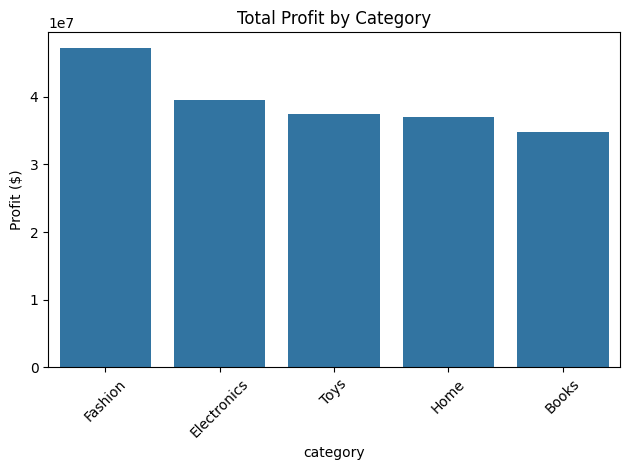

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the profit_by_category_df DataFrame for plotting
sns.barplot(x='category', y='total_profit', data=profit_by_category_df)
plt.title('Total Profit by Category')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
## Task 7: Export (PNG/CSV)
profit_by_category_df.to_csv('profit_by_category.csv', index=False)

ABOUT THIS PROJECT:

Credits & Attribution

This project was created by Oscar as part of a data science portfolio focused on SQL-based analysis, Python automation, and ethical data simulation.

📁 Data Attribution

•  Dataset: The data used in this project is synthetic and was programmatically generated to simulate realistic Amazon product sales for the year 2024.
•  Fields included: product_id, product_name, category, units_sold, price, cost, revenue, profit
•  Generation method: Python’s pandas and numpy libraries were used to simulate product-level sales, pricing, and profitability across multiple categories.
•  Purpose: This synthetic dataset is intended for educational and demonstrative purposes only. It does not reflect actual Amazon sales data.

🧪 Tools & Technologies

•  Python: Data generation, analysis, and visualization
•  SQLite: SQL schema design and query execution
•  Matplotlib & Seaborn: Visual insights into product profitability
•  Jupyter Notebook: Interactive development and documentation
•  Kaggle API: Used to explore real-world datasets for structure inspiration

📜 Ethical Notes

•  No proprietary or confidential Amazon data was used.
•  All data is fictional and designed to mimic realistic patterns for learning and demonstration.
•  This project adheres to ethical standards of attribution, reproducibility, and transparency.

📌 License

This project is released under the MIT License. You are free to use, modify, and share the code with proper attribution.
